In [204]:
#THIS IS SHAN'S BRANCH
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy.optimize import curve_fit
import random
import seaborn as sns


path1='../Cleaned_Data/Clearned_Original_Data'
path2='../Cleaned_Data/Original_Data_That_Contains_Critic_rating_Only'
path3='../Cleaned_Data/Original_Data_That_Contains_User_info_Only'

def Per(x):
        return "{:.2%}".format(x)

In [205]:
Odf=pd.read_csv(path1)
Cdf=pd.read_csv(path2)
Udf=pd.read_csv(path3)

In [206]:
Odf=Odf[['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales','Global_Sales']]
Odf=Odf.dropna(how='any')
Odf['Year_of_Release']=Odf['Year_of_Release'].astype(int)
Odf.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,82.53
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,31.37


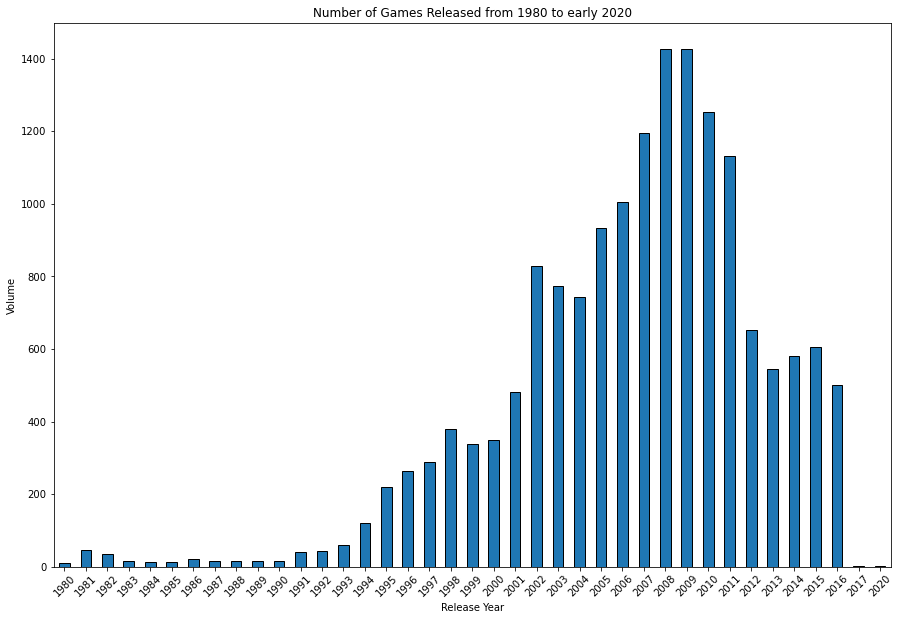

In [207]:

#Summary
Grouped=Odf.groupby('Year_of_Release')['Name'].count()
Grouped.plot(kind='bar',figsize=(15,10),xlabel='Release Year',ylabel='Volume',title='Number of Games Released from 1980 to early 2020',edgecolor='black')
plt.xticks(rotation=45)
plt.show()

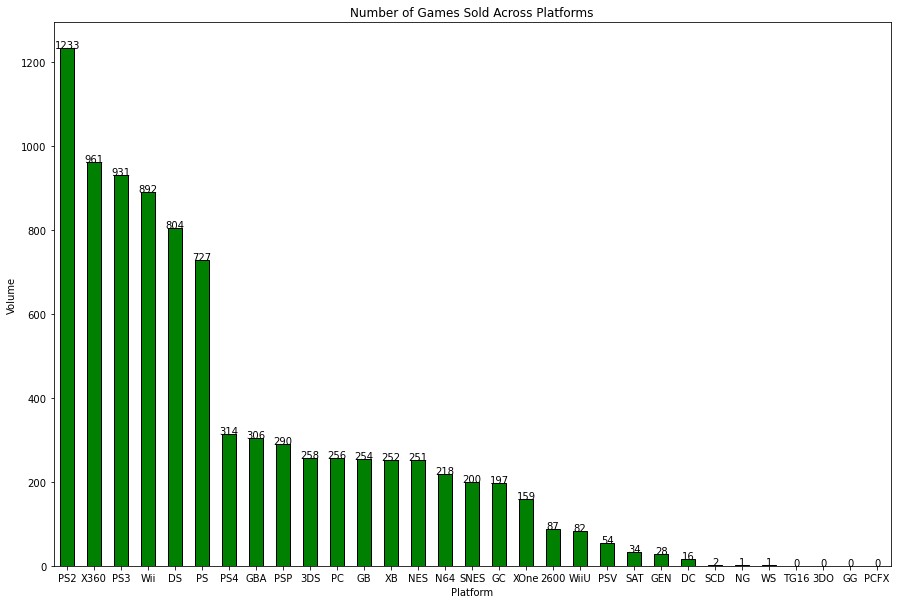

In [208]:
#Global Sale Across Platform
Grouped_Plat=Odf.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
Grouped_Plat.plot(kind='bar',figsize=(15,10),xlabel='Platform',ylabel='Volume',title='Number of Games Sold Across Platforms',color='g',edgecolor='black')
y=Grouped_Plat.to_list()
plt.xticks(rotation=0)

for i in range(len(Odf['Platform'].unique())):
        plt.text(i, y[i], round(y[i]), ha = 'center')
plt.show()

In [209]:
#Get Platform Life Span
grouped_Plat=Odf.groupby('Platform')
platform_Life=grouped_Plat['Year_of_Release'].value_counts()

platform=[]
life=[]
for index in platform_Life.items():
     if index[0][0] in platform:
         life[platform.index(index[0][0])]+=1
     else:
         platform.append(index[0][0])
         life.append(0)

plat_life=pd.DataFrame({'Platform':platform,'Total Life':life})
plat_life=plat_life.sort_values(by='Total Life')
max_life=plat_life['Total Life'].max()
min_life=plat_life['Total Life'].min()
avg_life=plat_life['Total Life'].mean()
plat_life


,Platform,Total Life
9,GG,0
14,PCFX,0
24,TG16,0
1,3DO,1
22,SCD,1
25,WS,2
12,NG,3
30,XOne,3
8,GEN,4
18,PS4,4


In [210]:
#Get More Recent Data
Recent_df=Odf.loc[Odf['Year_of_Release']>1999]
plat_df=pd.crosstab(Recent_df['Platform'], Recent_df['Year_of_Release'],margins=True, margins_name="total").sort_values(by='total', ascending=False)
plat_df


Year_of_Release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,total
Platform,,,,,,,,,,,,,,,,,,,,
total,350,482,829,775,743,934,1006,1196,1427,1426,1253,1133,653,544,581,606,500,3,1,14442
PS2,82,185,280,256,259,260,259,214,191,96,38,7,0,0,0,0,0,0,0,2127
DS,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0,0,1,2121
PS3,0,0,0,0,0,0,27,90,138,162,181,215,148,126,108,73,38,0,0,1306
Wii,0,0,0,0,0,0,44,185,282,325,253,143,31,12,6,4,1,0,0,1286
X360,0,0,0,0,0,18,93,123,146,172,182,206,106,75,63,35,13,0,0,1232
PSP,0,0,0,0,15,95,189,133,100,161,188,139,106,54,10,3,0,0,0,1193
PC,7,15,19,33,30,37,52,62,76,107,88,136,61,38,47,50,54,0,0,912
XB,1,33,158,189,177,179,62,3,1,0,0,0,0,0,0,0,0,0,0,803


In [211]:
glob_by_plat=grouped_Plat['Global_Sales'].sum().to_frame('Global_Sales')
glob_by_plat=glob_by_plat.sort_values(by='Global_Sales')
sum_pd=pd.merge(plat_life,glob_by_plat,on='Platform')
sum_pd

,Platform,Total Life,Global_Sales
0,GG,0,0.04
1,PCFX,0,0.03
2,TG16,0,0.16
3,3DO,1,0.10
4,SCD,1,1.87
5,WS,2,1.42
6,NG,3,1.44
7,XOne,3,159.44
8,GEN,4,28.36
9,PS4,4,314.23


The r-value is 0.5109689349373417


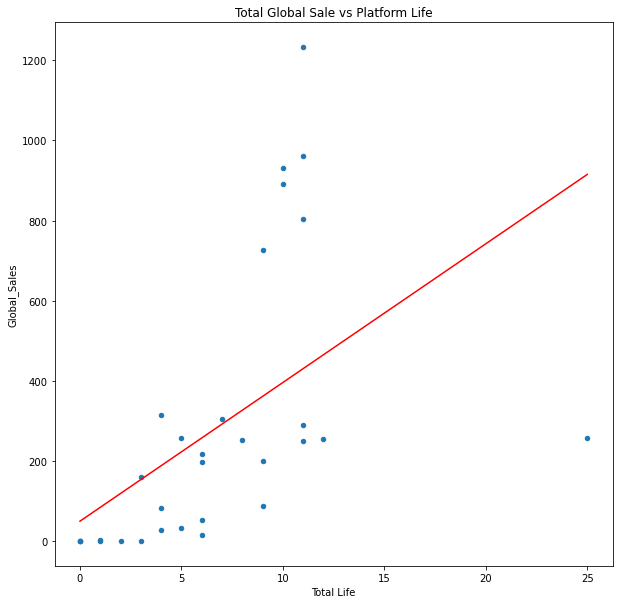

In [212]:
#Do a scatter plot between total life and global sale
sum_pd.plot(x='Total Life',y='Global_Sales',kind='scatter',title='Total Global Sale vs Platform Life',xlabel='Platform Life',ylabel='Global Sale',figsize=(10,10))
x=sum_pd['Total Life']
y=sum_pd['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.show()

<AxesSubplot:ylabel='Genre'>

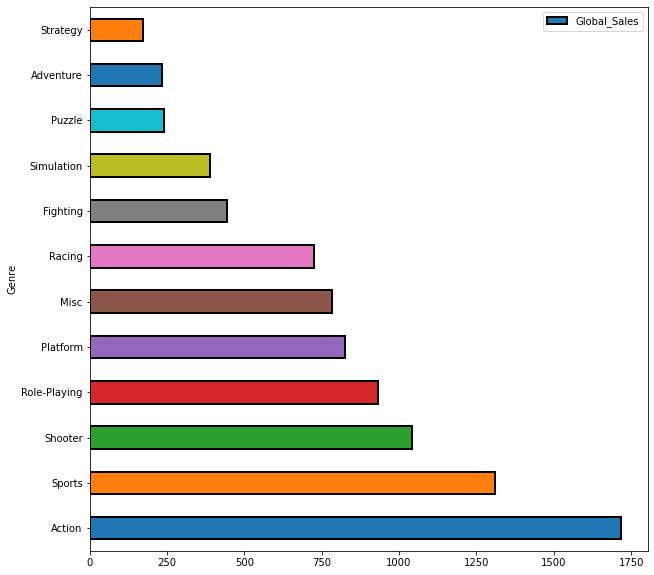

In [213]:
group_genre=Odf.groupby('Genre')
group_genre=group_genre.sum().sort_values(by='Global_Sales',ascending=False).reset_index()
palette = sns.color_palette(None, len(group_genre))
group_genre.plot(kind='barh',x='Genre',y='Global_Sales',color=palette,figsize=(10,10),edgecolor='black',linewidth=2)


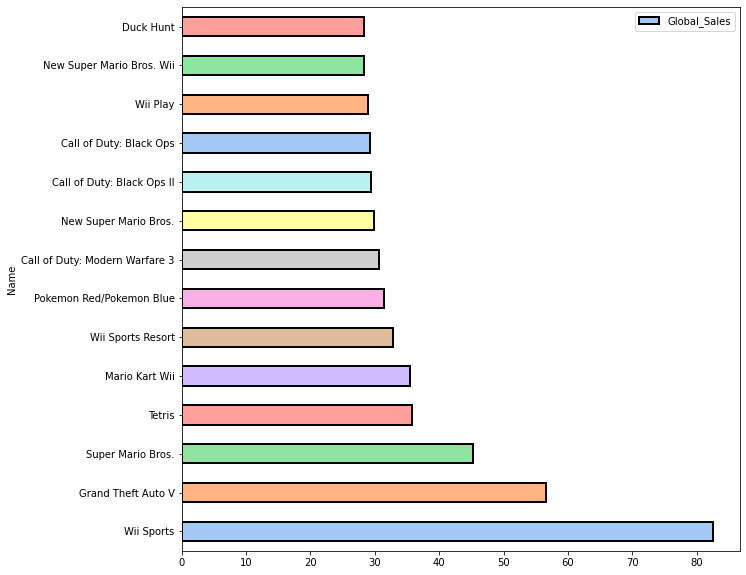

In [214]:
Name=Odf.groupby('Name')
Name=Name.sum().sort_values(by='Global_Sales',ascending=False)
Name=Name.reset_index()
Name=Name[['Name','Global_Sales']]
palette = sns.color_palette("pastel", len(Name))
Name.iloc[0:14,:].plot(kind='barh',x='Name',y='Global_Sales',figsize=(10,10),color=palette,edgecolor='black',linewidth=2,legend='Name')
name=Name['Name'].tolist()

The r-value is 0.2454706775067543


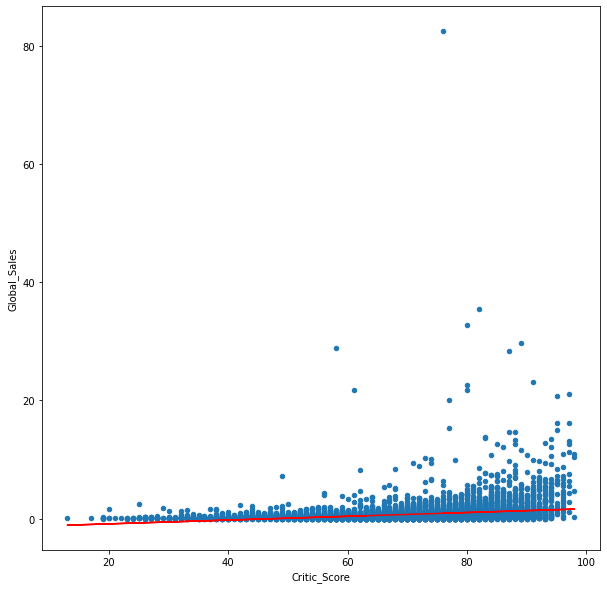

In [215]:
Cdf=Cdf[['Name','Global_Sales','Critic_Score']]
Cdf.plot(kind='scatter',x='Critic_Score',y='Global_Sales',figsize=(10,10))
x=Cdf['Critic_Score']
y=Cdf['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.08813917279231206


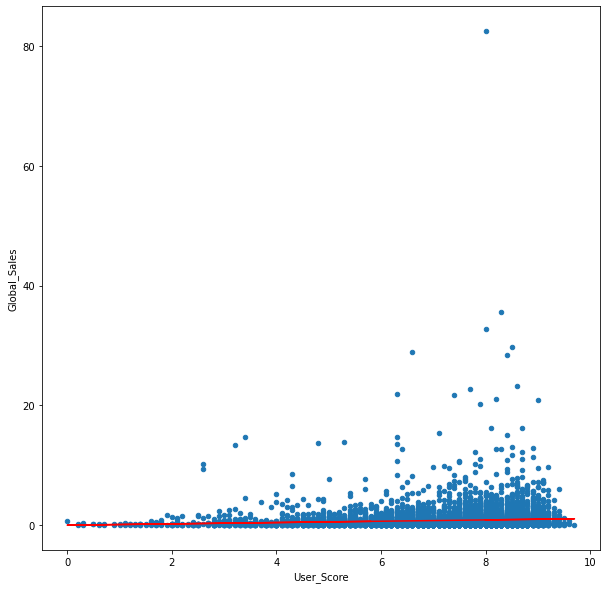

In [216]:
Udf=Udf[['Name','Global_Sales','User_Score','User_Count']]
Udf.plot(kind='scatter',x='User_Score',y='Global_Sales',figsize=(10,10))
x=Udf['User_Score']
y=Udf['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.show()

The r-value is 0.2650115243744528


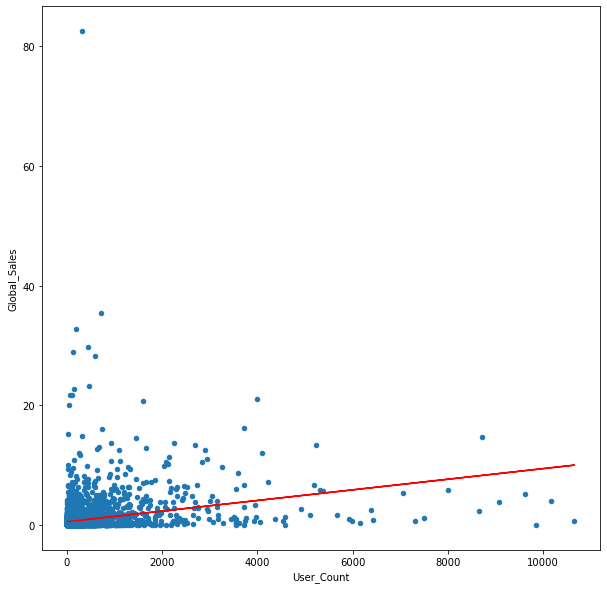

In [217]:
Udf.plot(kind='scatter',x='User_Count',y='Global_Sales',figsize=(10,10))
x=Udf['User_Count']
y=Udf['Global_Sales']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
print(f'The r-value is {rvalue}')
plt.show()

<AxesSubplot:xlabel='Year_of_Release'>

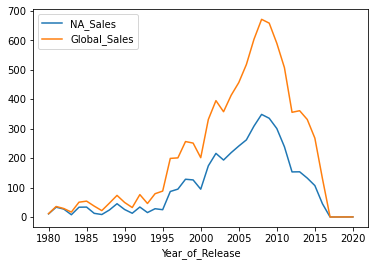

In [218]:
# plt.plot(Odf['Year_of_Release'],Odf['NA_Sales'])
Grouped1=Odf.groupby('Year_of_Release').sum().reset_index()
Grouped1.plot(kind='line',x='Year_of_Release',y=['NA_Sales','Global_Sales'])

<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

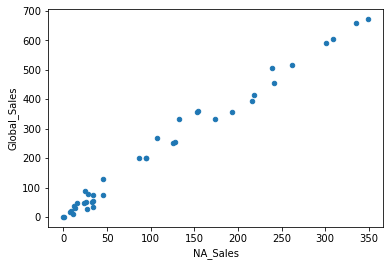

In [219]:
Grouped1.plot(kind='scatter',x='NA_Sales',y='Global_Sales')

<AxesSubplot:xlabel='Year_of_Release'>

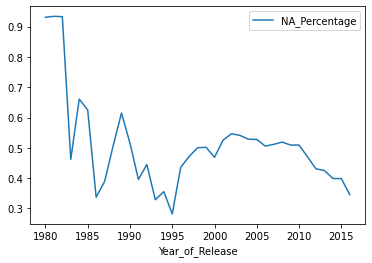

In [220]:
Grouped1['NA_Percentage']=(Grouped1['NA_Sales']/Grouped1["Global_Sales"])
Grouped1=Grouped1.loc[Grouped1['Year_of_Release']<2017]
Grouped1.plot(kind='line',x='Year_of_Release',y="NA_Percentage")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
191,Donkey Kong Country 2: Diddy's Kong Quest,SNES,1995,Platform,Nintendo,2.10,5.15
273,Warcraft II: Tides of Darkness,PC,1995,Strategy,Activision,1.70,4.21
285,Super Mario World 2: Yoshi's Island,SNES,1995,Platform,Nintendo,1.65,4.12
321,Namco Museum Vol.1,PS,1995,Misc,Sony Computer Entertainment,2.12,3.84
419,Tekken,PS,1995,Fighting,Sony Computer Entertainment,0.95,3.24


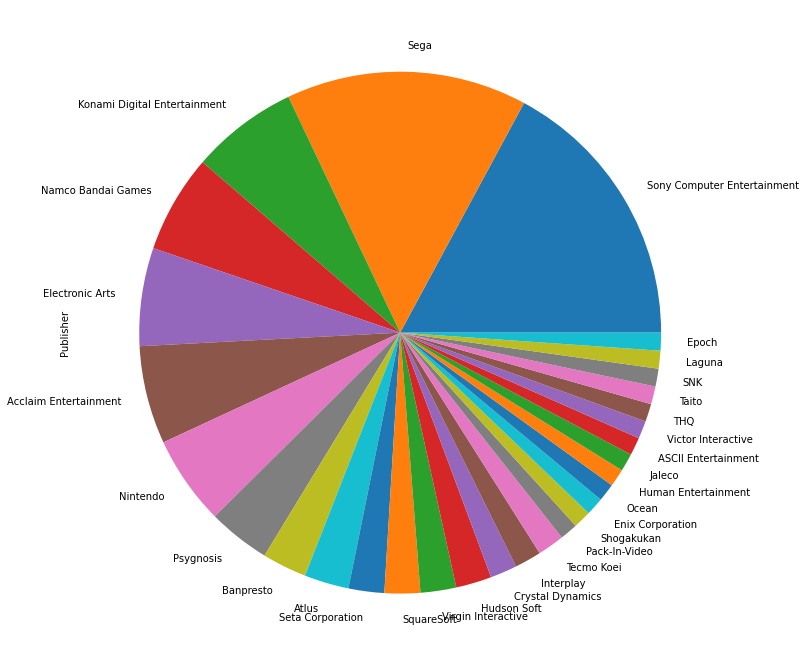

In [241]:
lgame=Odf.loc[Odf['Year_of_Release']==1995]
plat=lgame['Publisher'].value_counts()
plat=plat.iloc[0:30]
plat.plot(kind='pie',figsize=(12,12))
lgame.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
262,Asteroids,2600,1980,Shooter,Atari,4.00,4.31
546,Missile Command,2600,1980,Shooter,Atari,2.56,2.76
1764,Kaboom!,2600,1980,Misc,Activision,1.07,1.15
1968,Defender,2600,1980,Misc,Atari,0.99,1.05
2650,Boxing,2600,1980,Fighting,Activision,0.72,0.77


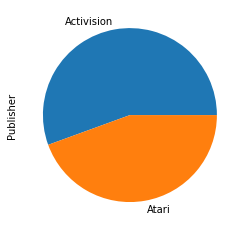

In [242]:
lgame=Odf.loc[Odf['Year_of_Release']==1980]
plat=lgame['Publisher'].value_counts()
plat.plot(kind='pie')
lgame.head(5)

In [223]:
path4="../Data/Video_Games_Sales.csv"
Fdf=pd.read_csv(path4)
Fdf=Fdf[['Name','Year_of_Release','Genre','Publisher','JP_Sales',"NA_Sales","Global_Sales"]]
Fdf

,Name,Year_of_Release,Genre,Publisher,JP_Sales,NA_Sales,Global_Sales
0,Wii Sports,2006.0,Sports,Nintendo,3.77,41.36,82.53
1,Super Mario Bros.,1985.0,Platform,Nintendo,6.81,29.08,40.24
2,Mario Kart Wii,2008.0,Racing,Nintendo,3.79,15.68,35.52
3,Wii Sports Resort,2009.0,Sports,Nintendo,3.28,15.61,32.77
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,Nintendo,10.22,11.27,31.37
...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,2016.0,Action,Tecmo Koei,0.01,0.00,0.01
16715,LMA Manager 2007,2006.0,Sports,Codemasters,0.00,0.00,0.01
16716,Haitaka no Psychedelica,2016.0,Adventure,Idea Factory,0.01,0.00,0.01
16717,Spirits & Spells,2003.0,Platform,Wanadoo,0.00,0.01,0.01


<AxesSubplot:xlabel='Year_of_Release'>

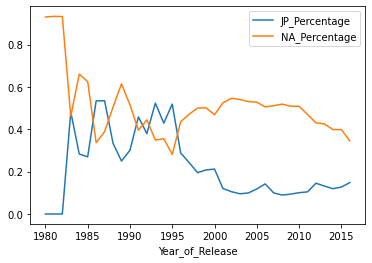

In [226]:
Grouped2=Fdf.groupby('Year_of_Release').sum().reset_index()
Grouped2['JP_Percentage']=(Grouped2['JP_Sales']/Grouped2["Global_Sales"])
Grouped2['NA_Percentage']=(Grouped2['NA_Sales']/Grouped2["Global_Sales"])
Grouped2=Grouped2.loc[Grouped2['Year_of_Release']<2017]
Grouped2.plot(kind='line',x='Year_of_Release',y=['JP_Percentage','NA_Percentage'])

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,Global_Sales
94,FIFA 17,PS4,2016,Sports,Electronic Arts,0.66,7.59
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,Nintendo,2.98,7.14
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.85,5.38
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,1.61,4.46
289,Battlefield 1,PS4,2016,Shooter,Electronic Arts,1.10,4.08
325,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.35,3.80
571,FIFA 17,XOne,2016,Sports,Electronic Arts,0.43,2.65
640,Call of Duty: Infinite Warfare,XOne,2016,Shooter,Activision,1.46,2.42
708,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.60,2.26
709,Battlefield 1,XOne,2016,Shooter,Electronic Arts,1.28,2.25


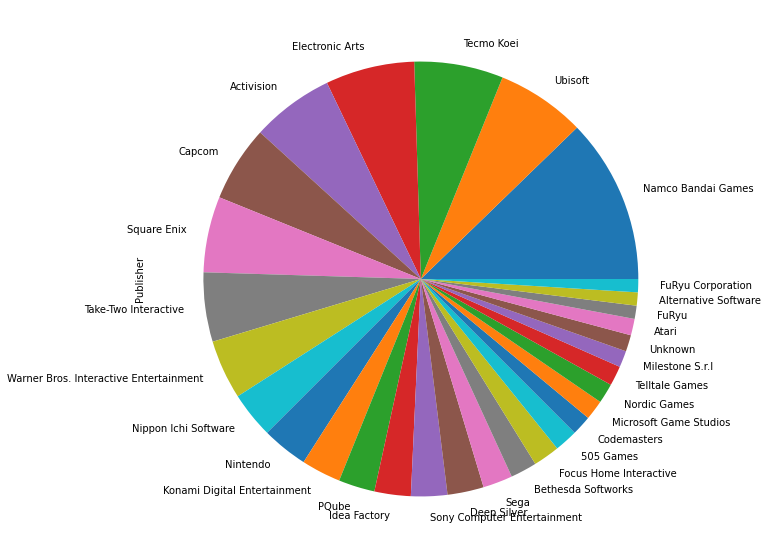

In [245]:
lgame=Odf.loc[Odf['Year_of_Release']==2016]
plat=lgame['Publisher'].value_counts()
plat=plat.iloc[0:30]
plat.plot(kind='pie',figsize=(10,10))
lgame.head(10)